In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
from collections import OrderedDict

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
pd.set_option('display.float_format',lambda x: '{:.3f}'.format(x))

In [196]:
dx=pd.read_csv('listings.csv')

In [197]:
dx.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,1.443,103.796,Private room,83,180,1,10/21/2013,0.010,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,1.332,103.785,Private room,81,90,18,12/26/2014,0.280,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,1.442,103.797,Private room,69,6,20,10/1/2015,0.200,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,1.345,103.957,Private room,206,1,14,8/11/2019,0.150,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,1.346,103.960,Private room,94,1,22,7/28/2019,0.220,9,355


In [198]:
dx.shape

(7907, 15)

In [199]:
dx['last_review'].unique()

array(['10/21/2013', '12/26/2014', '10/1/2015', ..., '4/9/2019',
       '6/17/2019', '3/22/2019'], dtype=object)

In [200]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   latitude                        7907 non-null   float64
 6   longitude                       7907 non-null   float64
 7   room_type                       7907 non-null   object 
 8   price                           7907 non-null   int64  
 9   minimum_nights                  7907 non-null   int64  
 10  number_of_reviews               7907 non-null   int64  
 11  last_review                     5149 non-null   object 
 12  reviews_per_month               51

In [201]:
dx.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7907.000,7907.000,7907.000,7907.000,7907.000,7907.000,7907.000,5149.000,7907.000,7907.000
mean,23388624.630,91144807.405,1.314,103.849,169.333,17.510,12.807,1.044,40.608,208.726
std,10164162.066,81909095.305,0.031,0.044,340.188,42.095,29.708,1.286,65.135,146.120
min,49091.000,23666.000,1.244,103.647,0.000,1.000,0.000,0.010,1.000,0.000
25%,15821800.500,23058075.000,1.296,103.836,65.000,1.000,0.000,0.180,2.000,54.000
50%,24706270.000,63448912.000,1.311,103.849,124.000,3.000,2.000,0.550,9.000,260.000
75%,32348500.000,155381142.000,1.322,103.873,199.000,10.000,10.000,1.370,48.000,355.000
max,38112762.000,288567551.000,1.455,103.973,10000.000,1000.000,323.000,13.000,274.000,365.000


In [202]:
dx.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [203]:
round(100*(dx.isnull().sum()/len(dx.index)),2)

id                                0.000
name                              0.030
host_id                           0.000
host_name                         0.000
neighbourhood_group               0.000
latitude                          0.000
longitude                         0.000
room_type                         0.000
price                             0.000
minimum_nights                    0.000
number_of_reviews                 0.000
last_review                      34.880
reviews_per_month                34.880
calculated_host_listings_count    0.000
availability_365                  0.000
dtype: float64

In [204]:
len(dx['last_review'].unique())

1002

In [205]:
len(dx['reviews_per_month'].unique())

528

In [206]:
for i in dx.columns:
    if dx[i].dtype=='O':
        print(i,'has',len(dx[i].unique()),'categories')

name has 7456 categories
host_name has 1833 categories
neighbourhood_group has 5 categories
room_type has 3 categories
last_review has 1002 categories


In [207]:
dx['reviews_per_month'].fillna(0,inplace=True)

In [208]:
(dx[dx['reviews_per_month']==0]).isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [209]:
dx['last_review'].unique()

array(['10/21/2013', '12/26/2014', '10/1/2015', ..., '4/9/2019',
       '6/17/2019', '3/22/2019'], dtype=object)

In [210]:
#dx['Last_review'].isnull().sum()

In [211]:
dx['Year']=dx['last_review'].copy()

In [212]:
dx['Year'].isnull().sum()

2758

In [213]:
dx['Year'].head(2)

0    10/21/2013
1    12/26/2014
Name: Year, dtype: object

In [214]:
dx.head(5)

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,1.443,103.796,Private room,83,180,1,10/21/2013,0.010,2,365,10/21/2013
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,1.332,103.785,Private room,81,90,18,12/26/2014,0.280,1,365,12/26/2014
2,56334,COZICOMFORT,266763,Francesca,North Region,1.442,103.797,Private room,69,6,20,10/1/2015,0.200,2,365,10/1/2015
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,1.345,103.957,Private room,206,1,14,8/11/2019,0.150,9,353,8/11/2019
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,1.346,103.960,Private room,94,1,22,7/28/2019,0.220,9,355,7/28/2019


In [215]:
dx['Year'].fillna('0/00/0000',inplace=True)

In [216]:
dx['Year']=dx['Year'].str.split('/')

In [217]:
dx['Year']

0       [10, 21, 2013]
1       [12, 26, 2014]
2        [10, 1, 2015]
3        [8, 11, 2019]
4        [7, 28, 2019]
             ...      
7902     [0, 00, 0000]
7903     [0, 00, 0000]
7904     [0, 00, 0000]
7905     [0, 00, 0000]
7906     [0, 00, 0000]
Name: Year, Length: 7907, dtype: object

In [218]:
#dx['last_review'].fillna('01/01/2012',inplace=True)

In [219]:
dx['Year']=dx['Year'].apply(lambda x:x[2])

In [220]:
dx['last_review'].fillna('01/01/2012',inplace=True)

In [221]:
dx.isnull().sum()

id                                0
name                              2
host_id                           0
host_name                         0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Year                              0
dtype: int64

In [222]:
len(dx['id'].unique())

7907

In [223]:
len(dx['host_id'].unique())

2705

In [224]:
len(dx['name'].unique())

7456

In [225]:
len(dx['host_name'].unique())

1833

In [226]:
dx.drop(['id','host_name','name'],axis=1,inplace=True)

In [227]:
dx.dtypes


host_id                             int64
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Year                               object
dtype: object

In [228]:
dx.head(20)

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year
0,266763,North Region,1.443,103.796,Private room,83,180,1,10/21/2013,0.010,2,365,2013
1,227796,Central Region,1.332,103.785,Private room,81,90,18,12/26/2014,0.280,1,365,2014
2,266763,North Region,1.442,103.797,Private room,69,6,20,10/1/2015,0.200,2,365,2015
3,367042,East Region,1.345,103.957,Private room,206,1,14,8/11/2019,0.150,9,353,2019
4,367042,East Region,1.346,103.960,Private room,94,1,22,7/28/2019,0.220,9,355,2019
5,367042,East Region,1.347,103.961,Private room,104,1,39,8/15/2019,0.380,9,346,2019
6,367042,East Region,1.343,103.963,Private room,208,1,25,7/25/2019,0.250,9,172,2019
7,1017645,East Region,1.323,103.914,Private room,50,90,174,5/31/2019,1.880,4,59,2019
8,1017645,East Region,1.325,103.912,Private room,54,90,198,4/28/2019,2.080,4,133,2019
9,1017645,East Region,1.325,103.912,Private room,42,90,236,7/31/2019,2.530,4,147,2019


In [229]:
dx['last_review']=pd.to_datetime(dx['last_review'],infer_datetime_format=True)

In [230]:
dx['Year']=dx['Year'].astype('int64')

In [231]:
dx['Year']

0       2013
1       2014
2       2015
3       2019
4       2019
        ... 
7902       0
7903       0
7904       0
7905       0
7906       0
Name: Year, Length: 7907, dtype: int64

In [232]:
dx.dtypes

host_id                                    int64
neighbourhood_group                       object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
Year                                       int64
dtype: object

In [233]:
for i in dx.columns:
   if dx[i].dtype=='O':
        dx=pd.concat([dx,pd.get_dummies(dx[i],prefix=i,drop_first=True)],axis=1)
        dx=dx.drop(i,axis=1)
    

In [234]:
dx.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room
0,266763,1.443,103.796,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0,1,0
1,227796,1.332,103.785,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0,1,0
2,266763,1.442,103.797,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0,1,0
3,367042,1.345,103.957,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0,1,0
4,367042,1.346,103.960,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0,1,0


In [235]:
dx.shape

(7907, 17)

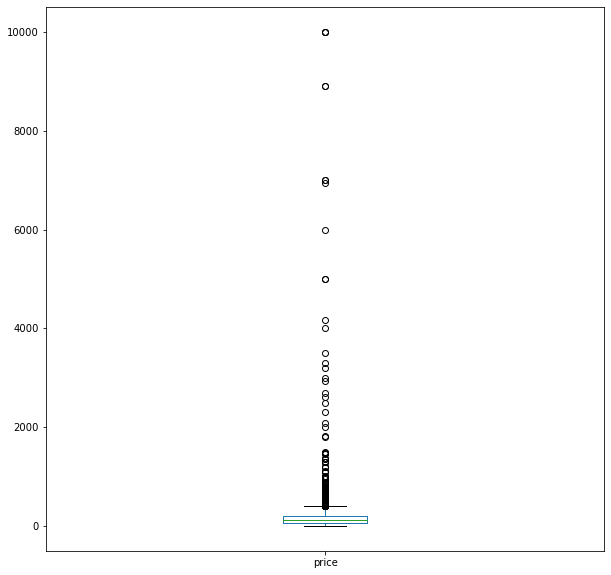

In [236]:
#PREPROCESSING....checking for outlier

plt.figure(figsize=(10,10))
dx['price'].plot.box()

In [237]:
dx['price'].values[dx['price'].values>400]=400

In [238]:
dx[dx['price']>400]

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room


In [239]:
dx['month']=dx['last_review'].dt.month

In [240]:
dx['month'].to_frame()

,month
0,10
1,12
2,10
3,8
4,7
...,...
7902,1
7903,1
7904,1
7905,1


In [241]:
dx

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,month
0,266763,1.443,103.796,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0,1,0,10
1,227796,1.332,103.785,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0,1,0,12
2,266763,1.442,103.797,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0,1,0,10
3,367042,1.345,103.957,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0,1,0,8
4,367042,1.346,103.960,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,278109833,1.280,103.788,100,3,0,2012-01-01,0.000,31,61,0,0,0,0,0,0,0,1
7903,238891646,1.293,103.826,400,6,0,2012-01-01,0.000,34,365,0,0,0,0,0,0,0,1
7904,281448565,1.313,103.860,58,30,0,2012-01-01,0.000,3,173,0,0,0,0,0,1,0,1
7905,243835202,1.295,103.838,56,14,0,2012-01-01,0.000,2,30,0,0,0,0,0,1,0,1


In [242]:
X = dx.drop('price', axis='columns')
y = dx['price']

In [243]:
#Checking for multicollinearity
cors = dx.corr(method='pearson')
cors

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,month
host_id,1.000,-0.041,-0.016,0.146,-0.090,-0.176,0.040,-0.064,0.042,-0.181,-0.037,-0.008,-0.021,-0.001,-0.106,-0.001,-0.138
latitude,-0.041,1.000,-0.035,-0.191,0.085,-0.015,-0.038,-0.150,-0.069,-0.040,0.136,0.560,0.425,0.264,0.232,-0.057,-0.023
longitude,-0.016,-0.035,1.000,0.011,-0.029,0.102,0.100,0.049,-0.036,0.032,0.487,-0.130,0.152,-0.675,-0.056,-0.018,0.027
price,0.146,-0.191,0.011,1.000,-0.104,-0.062,0.000,0.161,0.120,-0.085,-0.084,-0.066,-0.121,-0.097,-0.487,-0.208,-0.066
minimum_nights,-0.090,0.085,-0.029,-0.104,1.000,-0.076,-0.149,-0.014,0.150,-0.164,0.051,0.044,0.072,0.027,0.083,-0.073,-0.142
number_of_reviews,-0.176,-0.015,0.102,-0.062,-0.076,1.000,0.674,-0.150,-0.067,0.316,0.053,-0.019,-0.006,-0.060,0.023,-0.003,0.323
reviews_per_month,0.040,-0.038,0.100,0.000,-0.149,0.674,1.000,-0.181,-0.108,0.433,0.014,-0.016,-0.012,-0.074,-0.001,-0.030,0.459
calculated_host_listings_count,-0.064,-0.150,0.049,0.161,-0.014,-0.150,-0.181,1.000,0.246,-0.113,-0.114,-0.064,-0.123,-0.074,-0.327,-0.075,-0.140
availability_365,0.042,-0.069,-0.036,0.120,0.150,-0.067,-0.108,0.246,1.000,-0.071,-0.062,0.006,-0.060,-0.039,-0.062,0.102,-0.065
Year,-0.181,-0.040,0.032,-0.085,-0.164,0.316,0.433,-0.113,-0.071,1.000,0.015,-0.042,-0.013,-0.015,0.015,0.025,0.802


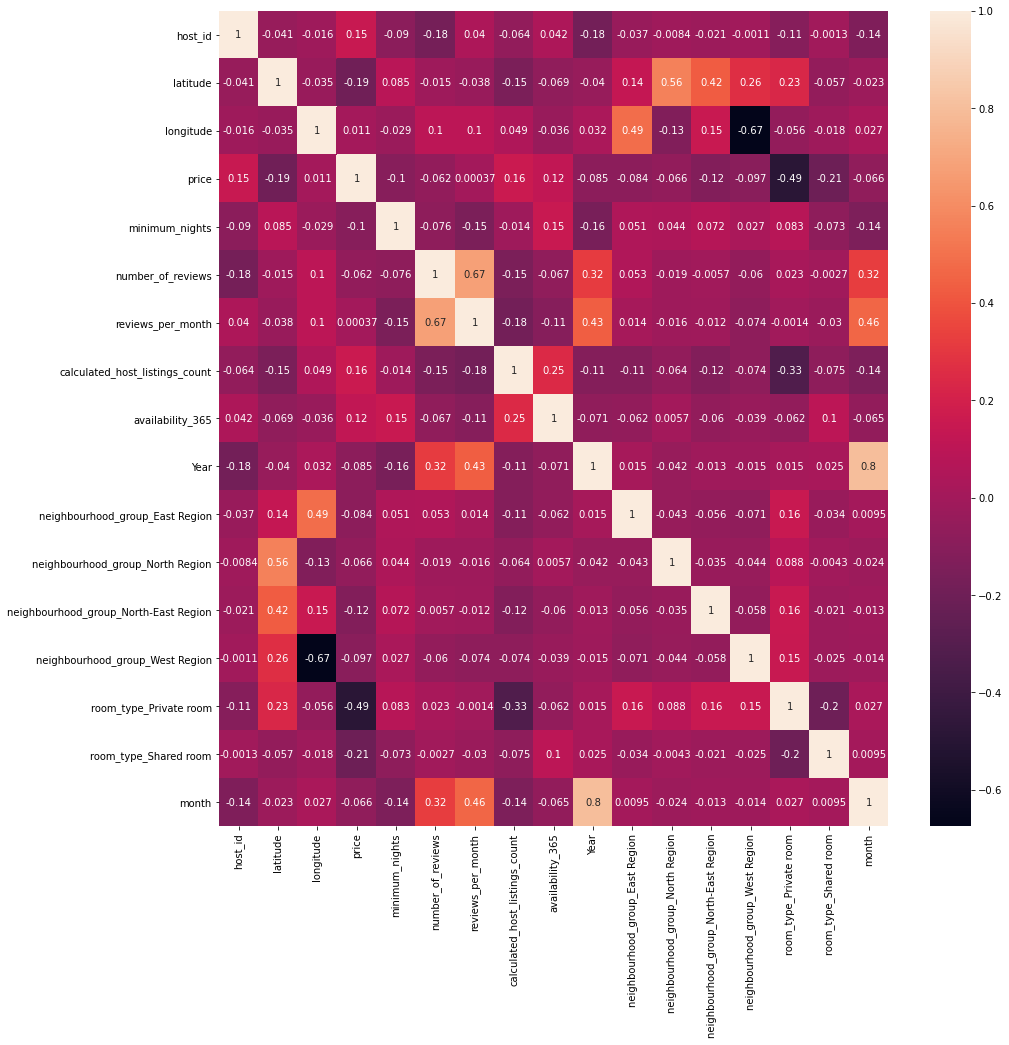

In [244]:
plt.figure(figsize=(15,15))
sns.heatmap(cors, annot=True)

In [245]:
dx.shape

(7907, 18)

In [246]:
X = dx.drop(['price','last_review'], axis='columns')
y = dx['price']

In [247]:
#X = dx.drop(['price','last_review'], axis='columns')
#y = dx['price']

In [248]:
dx.shape

(7907, 18)

In [249]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X,y)

imp = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)

imp

imp.columns = ['Importance']

imp.sort_values(by='Importance', ascending = False)

,Importance
host_id,0.753
calculated_host_listings_count,0.637
longitude,0.395
latitude,0.356
room_type_Private room,0.276
minimum_nights,0.259
availability_365,0.247
Year,0.078
room_type_Shared room,0.067
reviews_per_month,0.066


In [250]:
imp[imp['Importance']>=0.085].sort_values(by='Importance', ascending = False)

,Importance
host_id,0.753
calculated_host_listings_count,0.637
longitude,0.395
latitude,0.356
room_type_Private room,0.276
minimum_nights,0.259
availability_365,0.247


In [251]:
### FEATURES SELECTION

In [252]:
X.shape

(7907, 16)

In [253]:
#pip install streamlit


In [254]:
from sklearn.model_selection import train_test_split

In [255]:
#!streamlit hello

In [256]:
scaler=StandardScaler() # prepare the scaler


In [257]:
scaler.fit(X) # FITTING OUR SCALER

#scaler.fit_transform(x)

StandardScaler()

In [258]:
X=scaler.transform(X)

In [259]:
X

array([[-1.10956898,  4.19805041, -1.21330836, ...,  1.15700354,
        -0.22900313,  1.55788661],
       [-1.11004475,  0.59385877, -1.45579849, ...,  1.15700354,
        -0.22900313,  2.14772617],
       [-1.10956898,  4.19510688, -1.19338707, ...,  1.15700354,
        -0.22900313,  1.55788661],
       ...,
       [ 2.32350012, -0.04357948,  0.25582919, ...,  1.15700354,
        -0.22900313, -1.09639142],
       [ 1.86426245, -0.61364355, -0.24678255, ...,  1.15700354,
        -0.22900313, -1.09639142],
       [-0.76133463, -0.57145292, -0.35577717, ...,  1.15700354,
        -0.22900313, -1.09639142]])

In [260]:
##Splitting our data into the testing and trainning

X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=123)

In [261]:
#MODEL+_eVALUATION 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [262]:
##import the estimator object(model)


from sklearn.linear_model import LinearRegression

##3create instance of the estimator
linear_regression =LinearRegression()
###use the traininng data to train the estimator

linear_regression.fit(X_train,y_train)

LinearRegression()

In [263]:
##PREDICTION AND MODEL EVALUATION (R-squared,MSE,MAE)

y_train_pred1 = linear_regression.predict(X_train) # Train(Already)
y_pred1 = linear_regression.predict(x_test)

print('Train r2 score:', r2_score(y_train,y_train_pred1))
print('Train r2 score:', r2_score(y_test,y_pred1))

print('train_mae:',mean_absolute_error(y_train,y_train_pred1))
print('test_mae:',mean_absolute_error(y_test,y_pred1))

print('train_mse1:',mean_squared_error(y_train,y_train_pred1))
print('test_mse1:', mean_squared_error(y_test,y_pred1))


Train r2 score: 0.39077542796611275
Train r2 score: 0.3578525012206475
train_mae: 57.651867096919744
test_mae: 56.7453684803695
train_mse1: 6075.141335491112
test_mse1: 6026.676603110119


In [264]:
d=pd.DataFrame({'OLD': y_test,'NEW': y_pred1})

In [265]:
d

,OLD,NEW
1234,104,77.794
4480,260,226.136
239,69,58.667
2238,32,59.978
611,60,64.264
...,...,...
5285,156,173.405
2742,249,199.741
774,51,103.362
6696,85,128.528


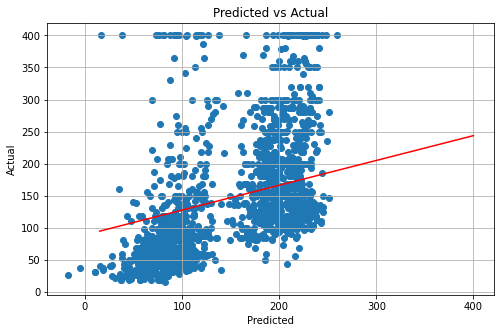

In [266]:
plt.subplots(figsize=(8,5))
plt.scatter(y_pred1,y_test)

plt.plot(np.unique(y_test),np.poly1d(np.polyfit(y_test,y_pred1,1))(np.unique(y_test)),c='r')
         
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()
         

In [267]:
###import the estimator object model

from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()

###USE THE TRAINING DATA TO TRAIN THE ESTIMATOR

knn.fit(X_train,y_train)

KNeighborsRegressor()

In [268]:
##PREDICTION AND MODEL EVALUATION (R-squared,MSE,MAE)

y_train_pred2 = linear_regression.predict(X_train) # Train(Already)
y_pred2 = linear_regression.predict(x_test)

print('Train r2 score:', r2_score(y_train,y_train_pred2))
print('Train r2 score:', r2_score(y_test,y_pred2))

print('train_mae:',mean_absolute_error(y_train,y_train_pred2))
print('test_mae:',mean_absolute_error(y_test,y_pred2))

print('train_mse1:',mean_squared_error(y_train,y_train_pred2))
print('test_mse1:', mean_squared_error(y_test,y_pred2))

Train r2 score: 0.39077542796611275
Train r2 score: 0.3578525012206475
train_mae: 57.651867096919744
test_mae: 56.7453684803695
train_mse1: 6075.141335491112
test_mse1: 6026.676603110119


In [269]:
pd.DataFrame({'OLD':y_test,'NEW':y_pred2})

,OLD,NEW
1234,104,77.794
4480,260,226.136
239,69,58.667
2238,32,59.978
611,60,64.264
...,...,...
5285,156,173.405
2742,249,199.741
774,51,103.362
6696,85,128.528


In [270]:
from sklearn.tree import DecisionTreeRegressor

dtress=DecisionTreeRegressor()

dtress.fit(X_train,y_train)

DecisionTreeRegressor()

In [271]:
y_train_pred3= dtress.predict(X_train) # Train(Already)
y_pred3 = dtress.predict(x_test)

print('Train r2 score:', r2_score(y_train,y_train_pred3))
print('Train r2 score:', r2_score(y_test,y_pred3))

print('train_mae:',mean_absolute_error(y_train,y_train_pred3))
print('test_mae:',mean_absolute_error(y_test,y_pred3))

print('train_mse1:',mean_squared_error(y_train,y_train_pred3))
print('test_mse1:', mean_squared_error(y_test,y_pred3))

Train r2 score: 1.0
Train r2 score: 0.1747644954807107
train_mae: 0.0
test_mae: 53.16182048040455
train_mse1: 0.0
test_mse1: 7744.992414664981


In [272]:
### D.RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestRegressor

##import the estimator object(model)


##create an instance of the estimator

rf= RandomForestRegressor() ##Notice here also estimating ng

## using the training data to train the estimator

rf.fit(X_train,y_train)

RandomForestRegressor()

In [273]:
y_train_pred4= rf.predict(X_train) # Train(Already)
y_pred4 = rf.predict(x_test)

print('Train r2 score:', r2_score(y_train,y_train_pred4))
print('Train r2 score:', r2_score(y_test,y_pred4))

print('train_mae:',mean_absolute_error(y_train,y_train_pred4))
print('test_mae:',mean_absolute_error(y_test,y_pred4))

print('train_mse1:',mean_squared_error(y_train,y_train_pred4))
print('test_mse1:', mean_squared_error(y_test,y_pred4))

Train r2 score: 0.9478028180770712
Train r2 score: 0.6002925817095757
train_mae: 14.749511462450593
test_mae: 40.449171934260434
train_mse1: 520.5063486482213
test_mse1: 3751.3302636536027


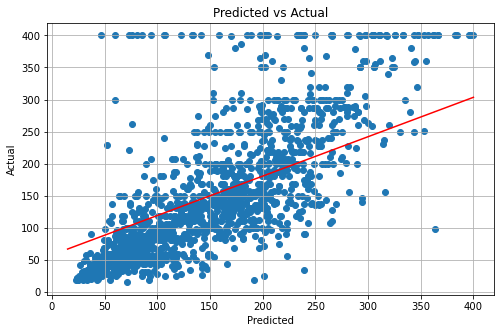

In [274]:
plt.subplots(figsize=(8,5))
plt.scatter(y_pred4,y_test)

plt.plot(np.unique(y_test),np.poly1d(np.polyfit(y_test,y_pred4,1))(np.unique(y_test)),c='r')
         
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()
         

E.XGBOOST

In [275]:
from xgboost import XGBRegressor
xgb_model1=XGBRegressor()
xgb_model1.fit(X_train,y_train,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [276]:
y_train_pred5= xgb_model1.predict(X_train) # Train(Already)
y_pred5 = xgb_model1.predict(x_test)

print('Train r2 score:', r2_score(y_train,y_train_pred5))
print('Train r2 score:', r2_score(y_test,y_pred5))

print('train_mae:',mean_absolute_error(y_train,y_train_pred5))
print('test_mae:',mean_absolute_error(y_test,y_pred5))

print('train_mse5:',mean_squared_error(y_train,y_train_pred5))
print('test_mse5:', mean_squared_error(y_test,y_pred5))

Train r2 score: 0.898057285013881
Train r2 score: 0.576012692560461
train_mae: 21.862464867175333
test_mae: 42.385050918073325
train_mse5: 1016.5650403705511
test_mse5: 3979.201648560073


In [277]:
pd.DataFrame({'OLD':y_test,'NEW':y_pred5})

,OLD,NEW
1234,104,126.188
4480,260,261.304
239,69,68.904
2238,32,40.442
611,60,58.590
...,...,...
5285,156,213.931
2742,249,195.212
774,51,80.351
6696,85,153.349


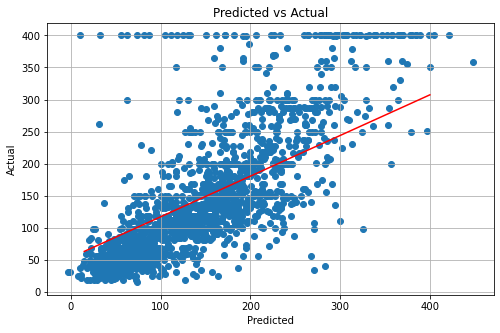

In [191]:
plt.subplots(figsize=(8,5))
plt.scatter(y_pred5,y_test)

plt.plot(np.unique(y_test),np.poly1d(np.polyfit(y_test,y_pred5,1))(np.unique(y_test)),c='r')
         
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

In [278]:
##XGBOOST  OPTIMIZATION:Is the problem of finding the set of inputs to a tragetr obejective function that result in the mininmum
#or maximum of the evaluation function

#using Grid search CV for optimization

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [279]:
##checking the parameter tha can be optimized in the models
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [280]:
param_grid=({'n_estimators':[10,100,100],'n_jobs':[2,4,6,8],'max_depth':[2,10,100]},
            {'n_estimators':[10,100,1000],'max_depth':[2,10,100],'n_jobs':[2,4,6,8]})
grid_search=GridSearchCV(xgb_model1,param_grid,cv=5,scoring='r2',return_train_score=True)
grid_search=grid_search.fit(X_train,y_train)

KeyboardInterrupt: 

In [91]:
###To see the best parameter for our model
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 100, 'n_jobs': 2}

In [92]:
###import the estimator object
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(X_train,y_train) # use the training data to train the estimator

RandomForestRegressor()

In [281]:
rf= RandomForestRegressor(max_depth=10,n_estimators=100,n_jobs=2)

rf.fit(X_train,y_train)

y_train_pred4a= rf.predict(X_train) # Train(Already)
y_pred4a = rf.predict(x_test) ##Test(new)

print('Train r2 score:', r2_score(y_train,y_train_pred4a))
print('Train r2 score:', r2_score(y_test,y_pred4a))

print('train_mae:',mean_absolute_error(y_train,y_train_pred4a))
print('test_mae:',mean_absolute_error(y_test,y_pred4a))

print('train_mse1:',mean_squared_error(y_train,y_train_pred4a))
print('test_mse1:', mean_squared_error(y_test,y_pred4a))

Train r2 score: 0.7677361470083388
Train r2 score: 0.5647973460283502
train_mae: 33.748727418186625
test_mae: 43.57824894117719
train_mse1: 2316.1175678442355
test_mse1: 4084.459812251947


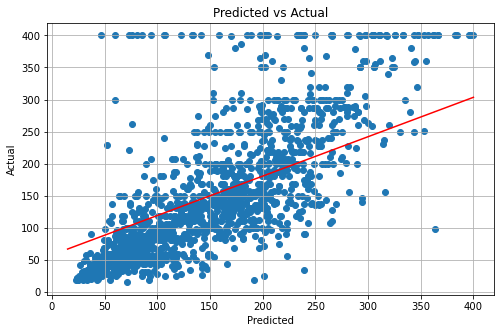

In [282]:
plt.subplots(figsize=(8,5))
plt.scatter(y_pred4,y_test)

plt.plot(np.unique(y_test),np.poly1d(np.polyfit(y_test,y_pred4,1))(np.unique(y_test)),c='r')
         
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

In [283]:
##VALIDATION

from sklearn.model_selection import cross_val_score
import sklearn.metrics


In [284]:
###use this to check the evaluate scores available for use in your validation

sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [285]:
##I will be using 'r evaluation metric to carry out evaluation on the lineear regression'
scores=cross_val_score(rf,X_train, y_train,scoring='r2',cv=10)

def display_scores(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('standard deviation:',scores.std())
    
display_scores(scores)

scores: [0.59694984 0.60114636 0.59001762 0.55197343 0.56054502 0.67071551
 0.54693152 0.58810541 0.56525362 0.60217075]
mean: 0.5873809057404493
standard deviation: 0.0339875709476806


In [286]:
import pickle
from pickle import dump


In [287]:
#save the model()
dump(rf,open('model(rf).pkl','wb'))

##save the scaler
dump(scaler,open('scaler.pkl','wb'))

In [288]:
model=pickle.load(open('model(rf).pkl','rb'))
model

RandomForestRegressor(max_depth=10, n_jobs=2)

In [289]:
#m=pd.DataFrame({'score':[7,8,4,3]})

In [290]:
import streamlit as st

In [291]:
%%writefile khala.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle

st.write("""
# AIRBNB HOUSE PRICE PREDICT APP:
"""
)

model=pickle.load(open('model(rf).pkl', 'rb'))

scaler=pickle.load(open('scaler.pkl', 'rb'))



st.sidebar.header('User Input Parameters')

def user_input_features():
    
    Room_type=st.sidebar.selectbox('Room Type',('Private room','Entire home/apt', 'Shared room'))
         
    if Room_type=='Private room':
            Entire=0
            Private =1
            Shared=0
    if Room_type=='Entire home/apt':
            Entire=1
            Private=0
            Shared =0
            
    if Room_type=='Shared room':
            Entire =0
            Private =0
            Shared=1
            
    Region_hood=st.sidebar.selectbox('Region', ('North Region','Central Region','East Region', 'West Region','North East Region'))
         
    if Region_hood=='Central Region':
        Central=1
        North=0
        East=0
        West=0
        North_East=0
        
    if Region_hood=='North Region':
        Central=0
        North=1
        East=0
        West=0
        North_East=0
    

    if Region_hood=='West Region':
        Central=0
        North=0
        East=0
        West=1
        North_East=0
        
    if Region_hood=='East Region':
        Central=0
        North=0
        East=1
        West=0
        North_East=0
        
    if Region_hood=='North East Region':
        Central=0
        North=0
        East=0
        West=0
        North_East=1



    Host_id=st.number_input('What is the Host ID')
    Host_list_count=st.number_input('Host listing count')
    longitude=st.number_input("Building's Longitudinal Location")
    latitude=st.number_input("Building's Latitudinal Location")
    

    
    
    minimum_nights=st.number_input('How many nights will you be staying for')
    availability=st.number_input('For how many days is the building available ')
    last_rev_month=st.number_input('On which month was the last review',max_value=12,min_value=1,step=1)
    last_rev_year=st.number_input('On which year was the last review',max_value=2022,min_value=2012,step=1)
    no_reviews=st.number_input('Number of reviews received')
    reviews_per_month=st.number_input('How many reviews per month')
    

        
        
    data={'host_id':Host_id,
         'latitude':latitude,
         'longitude':longitude,
         'minimum_nights':minimum_nights,
         'calculated_host_listings_count':Host_list_count,
         'availabilty_365':availability,
         'last_review_month':last_rev_month,
         'last_review_year':last_rev_year,
         'number_of_reviews':no_reviews,
         'reviews_per_month':reviews_per_month,
         'room_type_Private room':Private,
         'room_type_Shared room':Shared,
         'neighbourhood_group_North-East Region':North_East,
         'neighbourhood_group_East Region':East,
         'neighbourhood_group_North Region':North,
         'neighbourhood_group_West Region':West}
    
    features = pd.DataFrame(data, index=[0])
    return features

input_df =user_input_features()
input_df =scaler.transform(input_df)

if st.button('PREDICT'):
    y_out=model.predict(input_df)
    st.write(f' This room will cost you $',y_out[0])
    

Overwriting khala.py


In [292]:
!streamlit run khala.py

^C
